# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [6]:
# Import relevant Python libraries and modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [7]:
data = pd.read_csv("marketing_sales_data.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about loading data in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to read data from a .csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [8]:
# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [9]:
data.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

**Question:** What do you observe about the different variables included in the data?

- The `TV` or TV promotion budget is an ordinal data type ('Low', 'Medium', 'High')
- The `Radio` Radio promotion budget and `Social Media` Social Media budget are continuous data type.
- The `Influencer` or the type of influencer involved in the promotion is an ordinal data type ('Mega', 'Macro', 'Micro', 'Nano')
    - Mega: over 1 million followers
    - Macro: 100 000 to 1 million followers
    - Micro: 10 000 to 100 000 followers
    - Nano: less than 10 000 followers
- `Sales` is the sales accrued from the promotion which is a numerical data type.

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [10]:
# Display number of rows, number of columns.
data.shape

(572, 5)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a property in every DataFrame in `pandas` that gives you access to the number of rows and the number of columns as a tuple.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `shape` property.

</details>

**Question:** How many rows and columns exist in the data?

- There 572 rows and 5 columns
- The 572 is the number of companies and 5 columns is their attribute on how they strategize promotion and the equivalent sales.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [11]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [12]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [13]:
# Use .sum() to get the number of rows that contain missing values.
data.isna().any(axis=1).sum()

np.int64(3)

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

- There are only 3 rows containing missing values, it is therefore appropriate to drop these missing values and proceed for modelling.

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [14]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.
data.dropna(axis=0, inplace =True)

In [15]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()


np.int64(0)

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

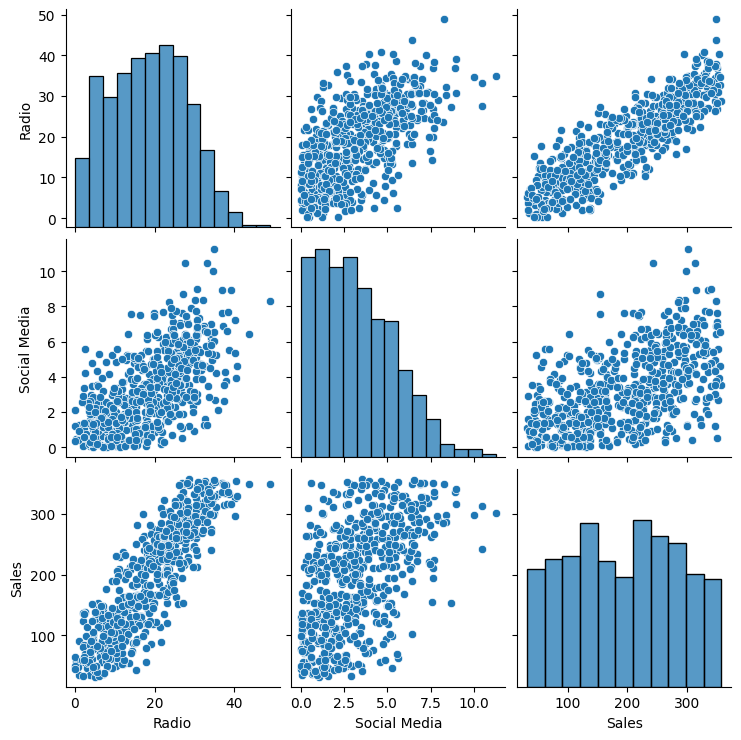

In [16]:
# Create plot of pairwise relationships.
sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about creating a plot that shows the relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `seaborn` library that you can call to create a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `pairplot()` function from the `seaborn` library.

</details>

**Question:** Is the assumption of linearity met?

Variables Radio and Sales were observed to have linearity.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about checking model assumptions for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use the scatterplot of `Sales` over `Radio` found in the preceding plot of pairwise relationships. 

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Check the scatterplot of `Sales` over `Radio` found in the plot of pairwise relationships. If the data points cluster around a line, that indicates that the assumption of linearity is met. Alternatively, if the data points resemble a random cloud or a curve, then a linear model may not fit the data.  

</details>

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [17]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data = data[['Radio', 'Sales']]

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about selecting multiple columns from a DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use two pairs of square brackets around the names of the columns that should be selected.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Make sure column names are spelled exactly as they are in the data.

</details>

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [19]:
# Display first 10 rows of the new DataFrame.

ols_data.head(10)


,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about displaying contents of a DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to display the first n number of rows of a DataFrame, where n is a number of your choice.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows from the top that you want to display. 

</details>

Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [20]:
# Write the linear regression formula.
# Save it in a variable.

ols_formula = "Sales ~ Radio"

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section where model building for linear regression is discussed. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Save the formula as string.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

</details>

Now, implement the ordinary least squares (OLS) approach for linear regression.

In [21]:
# Implement OLS.

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video that discusses model building for linear regression.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to implement OLS.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  You can call the `ols()` function from the `statsmodels` library.

</details>

Now, create a linear regression model for the data and fit the model to the data.

In [22]:
# Fit the model to the data.
# Save the fitted model in a variable.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.07e-176
Time:                        12:33:55   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to fit the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `fit()` function from the `statsmodels` library.

</details>

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [23]:
# Get summary of results.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.07e-176
Time:                        12:34:14   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You may find it helpful to refer back to the video section where getting model results is discussed.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to get the summary of results from a model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `summary()` function from the `statsmodels` library.

</details>

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

- y-intercept is 41.5326

**Question:** What is the slope? 

- Slope is 8.1733

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


- sales = (8.1733 * radio promotion budget) + 41.5326

**Question:** What does the slope mean in this context?

- It means for every 1 million budget in radio promotion would yield a sales of 8.17 million

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

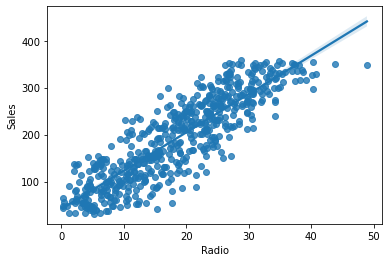

In [ ]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x = "Radio", y = "Sales", data = ols_data)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about plotting data with the best fit regression line.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be useful here.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `regplot()` function from the `seaborn` library.

</details>

**Question:** What do you observe from the preceding regression plot?

First assumpion of linear regression is met, which is test of linearity. Since the data follows the best fit line.

Now, check the normality assumption. Get the residuals from the model.

In [24]:
# Get the residuals from the model.
residuals = model.resid

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about accessing residuals.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is an attribute from the `statsmodels` library that can be called to get the residuals from a fitted model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `resid` attribute from the `statsmodels` library.

</details>

Now, visualize the distribution of the residuals.

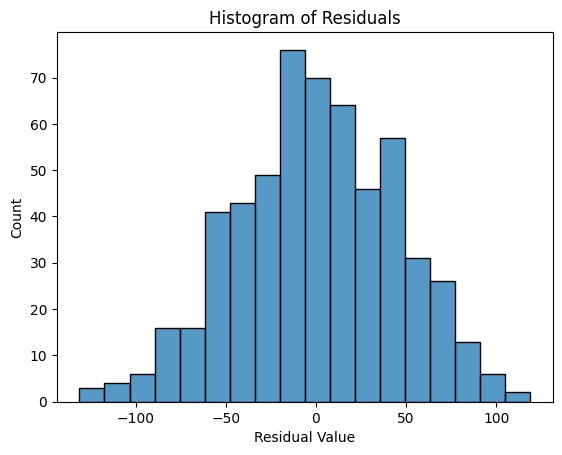

In [25]:
# Visualize the distribution of the residuals.
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about visualizing residuals.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a histogram.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library.

</details>

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

- Based on the historgam presented, the distribution is approximately normal and verifies the first assumption.

Next, create a Q-Q plot to confirm the assumption of normality.

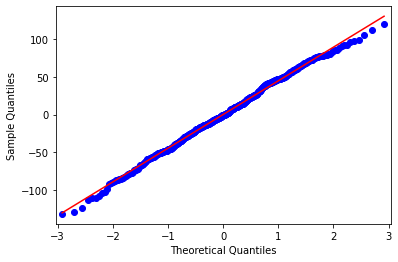

In [ ]:
# Create a Q-Q plot.
fig = sm.qqplot(model.resid, line = 's')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about creating a Q-Q plot.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to create a Q-Q plot.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `qqplot()` function from the `statsmodels` library.

</details>

**Question:** Is the assumption of normality met?

- Based on the q-q plot, the data points follow the straight diagonal line leading upward, which verifies the second assumption of normality

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [ ]:
# Get fitted values.


fitted_values = model.predict(ols_data["Radio"])
fitted_values

0       51.490549
1      163.721447
2      126.348847
3      257.873419
4      342.932984
          ...    
567    272.106897
568    234.247630
569    116.480147
570    136.043547
571    195.311256
Length: 569, dtype: float64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about calculating fitted values.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to calculate fitted values from the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `predict()` function from the `statsmodels` library. Make sure to pass in the column from `ols_data` corresponding to the x variable.

</details>

Next, create a scatterplot of the residuals against the fitted values.

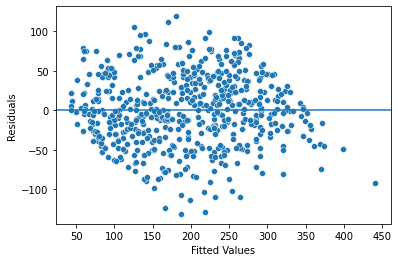

In [ ]:
# Create a scatterplot of residuals against fitted values.
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()




<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about visualizing residuals against fitted values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a scatterplot.

</details>

<details>
  <summary><h4>Hint 3</h4></summary>

Call the `scatterplot()` function from the `seaborn` library.

</details>

**Question:** Are the assumptions of independent observation and homoscedasticity met?


- Based on the scatter plot the data forms like a cloud like and does not follow a specific line thread. This confirms thats the third assumption of individual observation is met.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

- Performing an EDA and Visualization such as pairplot could help us draw relationships in between the variables.

- A linear regression model is interpretable, as modelling one would give as coefficient.

**How would you present your findings from this lab to others?**

- Based on the EDA there is a clear relationship between radio promotion and sales. We then proceeded in fitting a simple regression in order to determine the exact relationship of the two variables. Our model resulted to y-intercept with 41.53 and slope of 8.17, meaning a 1 million dollar increase in radio promotion would lead to an increase of 8.17 million dollar of sales. The result is statistically significant based on the p-value of 0.00 which smaller than the significance level of 0.05. We therefore reject the null hypothesis and state that there is a relationship between radio promotion budget and sales.

**What summary would you provide to stakeholders?**

- Based on the linear regression model, there is a relationship between radio promotion budget and sales. A 1 million dollar increase in radio promotion is associated to 8.17 million increase in sales.

- It is also worth examining the relationship of other variables with respect to sales, in order to have a more effective strategy in promotion.

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.